In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [2]:
df = pd.read_csv(r"diabetes.csv")

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.shape

(768, 9)

In [8]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [10]:
X_train.shape

(614, 8)

In [11]:
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]

In [12]:
X_train_bias.shape

(614, 9)

In [13]:
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test] 

In [14]:
X_test_bias.shape

(154, 9)

In [15]:
y_train = y_train.to_numpy().reshape(-1,1)

In [16]:
y_test = y_test.to_numpy().reshape(-1,1)

In [17]:
y_test.shape

(154, 1)

In [18]:
weights_initial = np.random.randn(X_train_bias.shape[1]) * 0.01

In [19]:
weights_initial = weights_initial.reshape(-1,1)

In [20]:
weights_initial.shape

(9, 1)

In [21]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-1*Z))

In [22]:
def compute_cost(X, y, W):
    n = X.shape[0]
    Z = np.dot(X, W)
    y_pred = sigmoid(Z)
    cost = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

In [23]:
def gradient_descent(X, y, W, learning_rate=0.01, n_steps=1000, print_cost=True):
    n = X.shape[0]
    for i in range(n_steps):
        Z = np.dot(X, W)
        y_pred = sigmoid(Z)
        gradient = np.dot(X.T, (y_pred - y)) / n
        W -= learning_rate * gradient

        if print_cost and i % 100 == 0:
            cost = compute_cost(X, y, W)
            print(f"Iteration {i} - Cost: {cost:.4f}")
    return W

In [24]:
start_time = time.time()
weights_final = gradient_descent(X_train_bias, y_train, weights_initial, learning_rate = 0.0001, n_steps = 1000, print_cost=True)
end_time = time.time()

Iteration 0 - Cost: 0.9742
Iteration 100 - Cost: 0.6282
Iteration 200 - Cost: 0.6215
Iteration 300 - Cost: 0.6199
Iteration 400 - Cost: 0.6192
Iteration 500 - Cost: 0.6188
Iteration 600 - Cost: 0.6184
Iteration 700 - Cost: 0.6181
Iteration 800 - Cost: 0.6178
Iteration 900 - Cost: 0.6175


In [25]:
start_time_test = time.time()
y_pred_probs = sigmoid(np.dot(X_test_bias, weights_final))
y_pred_probs.shape
y_pred_probs[:5]
y_preds = (y_pred_probs >= 0.5).astype(int)
y_preds[:5]
end_time_test = time.time()
test_duration = end_time_test - start_time_test

In [26]:
test_accuracy = accuracy_score(y_test, y_preds)

In [27]:
cm = confusion_matrix(y_test, y_preds)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[84 16]
 [38 16]]


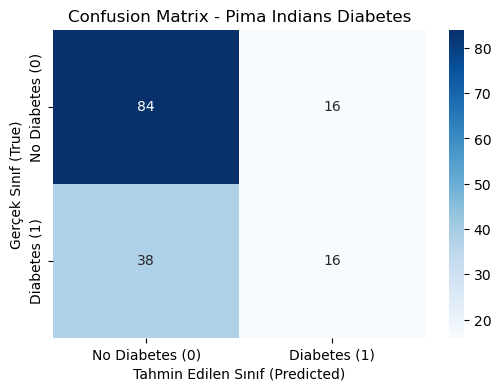

Test Accuracy: 0.6494
Train Time: 0.0204 saniye
Test Time: 0.0010 saniye


In [28]:
class_names = ["No Diabetes (0)", "Diabetes (1)"]
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,       
    fmt="d",         
    cmap="Blues",   
    xticklabels=class_names,
    yticklabels=class_names
)
plt.title("Confusion Matrix - Pima Indians Diabetes")
plt.ylabel("Gerçek Sınıf (True)")
plt.xlabel("Tahmin Edilen Sınıf (Predicted)")
plt.show()
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Train Time: {end_time - start_time:.4f} saniye")
print(f"Test Time: {test_duration:.4f} saniye")